In [1]:
import numpy as np
import pandas
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
import os
os.environ["LANG"] = "en_US.UTF-8"
import chromedriver_autoinstaller
import matplotlib.pyplot as plt
import bs4
import requests
from unidecode import unidecode
import re
import pandas as pd
from sklearn.metrics import r2_score

In [3]:
star_data = pd.read_csv('star_data.csv')
star_data

,Star Name,Distance (pc),Image URL,Spectral Class,Center Pixel,L/L_o
0,Absolutno,273.845058,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '8', 'V')",255,0.656000
1,Acamar,49.431537,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '2', 'V')",255,23.600000
2,Achernar,42.753313,https://alasky.u-strasbg.fr/hips-image-service...,"('B', '6', 'V')",233,97.521203
3,Achird,5.923041,https://alasky.u-strasbg.fr/hips-image-service...,"('F', '9', 'V')",255,1.193670
4,Acubens,54.554183,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '7', 'V')",255,8.149287
...,...,...,...,...,...,...
299,Zavijava,11.001766,https://alasky.u-strasbg.fr/hips-image-service...,"('F', '9', 'V')",255,1.193670
300,Zhang,76.182930,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '7', 'III')",255,40.426122
301,Zibal,36.503011,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '4', 'V')",255,15.118020
302,Zubenelhakrabi,50.025013,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '8.5', 'III')",255,46.156500


In [4]:
stellar_data_I = pd.read_csv('stellar_data_Iab.csv')
stellar_data_I

,sp,T_eff,L/L_o,R/R_o
0,O5,40900,1140000,21.2
1,O6,38500,998000,22.4
2,O7,36200,877000,23.8
3,O8,34000,769000,25.3
4,B0,26200,429000,31.7
5,B1,21400,261000,37.3
6,B2,17600,157000,42.8
7,B3,16000,123000,45.8
8,B5,13600,79100,51.1
9,B6,12600,65200,53.8


In [5]:
stellar_data_III = pd.read_csv('stellar_data_III.csv')
stellar_data_III

,sp,T_eff,L/L_o,R/R_o
0,O5,39400,741000,18.5
1,O6,37800,519000,16.8
2,O7,36500,375000,15.4
3,O8,35000,277000,14.3
4,B0,29200,84700,11.4
5,B1,24500,32200,10.0
6,B2,20200,11100,8.6
7,B3,18300,6400,8.0
8,B5,15100,2080,6.7
9,B6,13800,1200,6.1


In [6]:
stellar_data_V = pd.read_csv('stellar_data_V.csv')
stellar_data_V

,sp,T_eff,L/L_o,R/R_o
0,O5,42000,499000.0000,13.40
1,O6,39500,324000.0000,12.20
2,O7,37500,216000.0000,11.00
3,O8,35800,147000.0000,10.00
4,B0,30000,32500.0000,6.70
5,B1,25400,9950.0000,5.20
6,B2,20900,2920.0000,4.10
7,B3,18800,1580.0000,3.80
8,B5,15200,480.0000,3.20
9,B6,13700,272.0000,2.90


/Users/jminding/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jminding/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jminding/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jminding/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jminding/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/User

{'I': {'O': [poly1d([-2.13509331e+01,  2.64499993e+02,  8.63813412e+02, -1.56865964e+04,
          -1.26230765e+05,  1.95675123e+06]),
   1.0],
  'B': [poly1d([-2.06236791e+01,  7.22918864e+02, -9.80414034e+03,  6.54683631e+04,
          -2.29896233e+05,  4.29984973e+05]),
   0.999234969581107],
  'A': [poly1d([ 4.87102837e-02, -7.79364540e-01, -4.38780035e+00,  2.17888299e+02,
          -2.31276984e+03,  3.75000000e+04]),
   1.0],
  'F': [poly1d([-3.25096534e-02, -1.82474665e-02,  2.24830245e+00,  2.82396604e+01,
          -1.14806396e+02,  2.88000000e+04]),
   1.0],
  'G': [poly1d([-3.64055031e-03, -2.29839612e-02,  1.26062149e-02,  6.36349814e+00,
           2.37464699e+02,  3.03000000e+04]),
   1.0],
  'K': [poly1d([-2.57936508e-01,  1.68650794e+00,  1.47817460e+01, -2.07341270e+01,
           9.04523810e+02,  3.31000000e+04]),
   1.0],
  'M': [poly1d([   74.16666667,  -746.21212121,  3150.37878788, -3800.75757576,
           9802.72727273, 51888.52813853]),
   0.9999964379434253]}

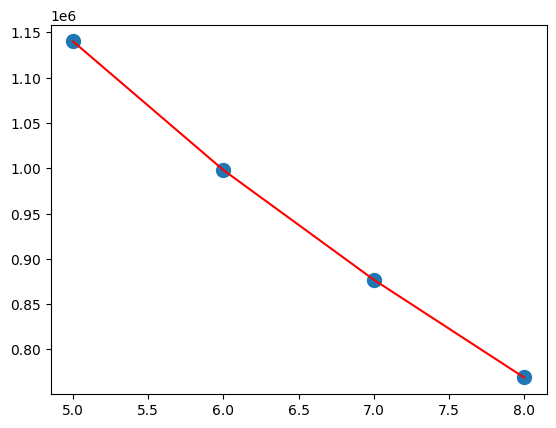

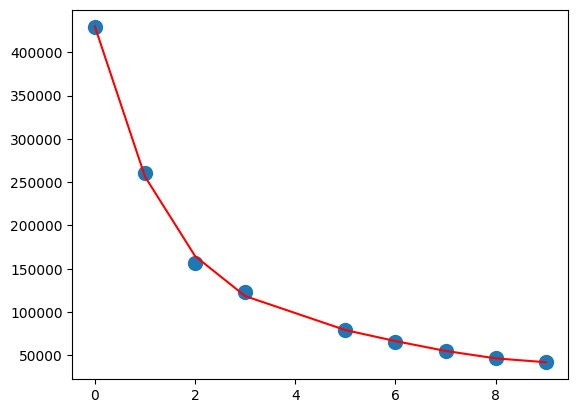

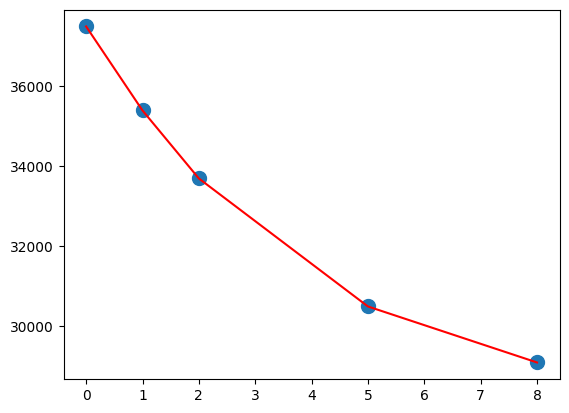

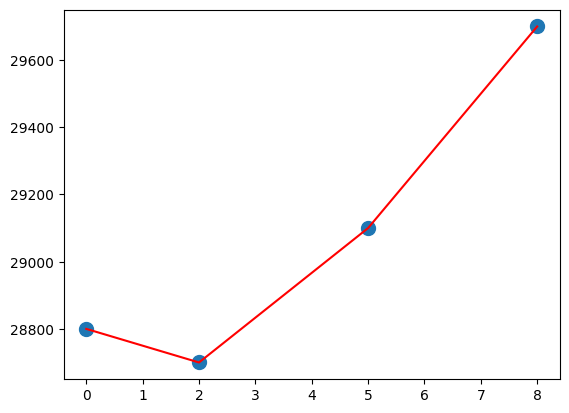

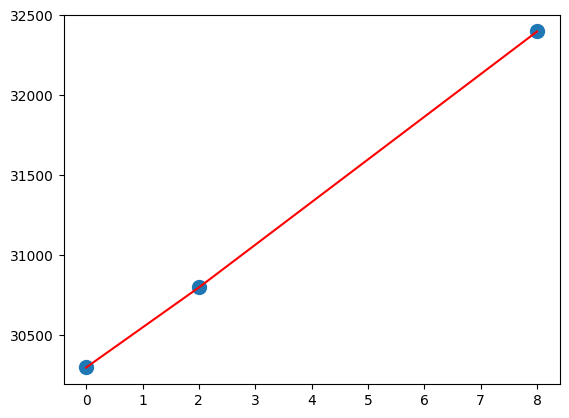

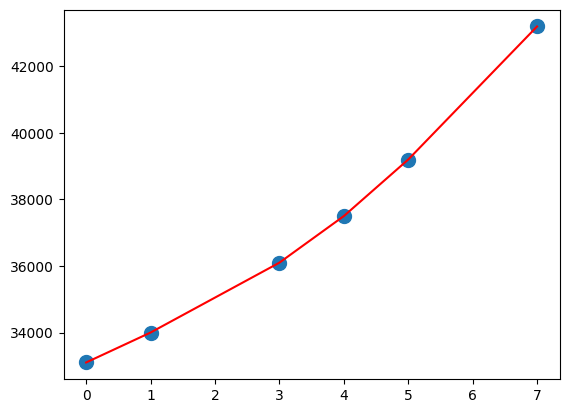

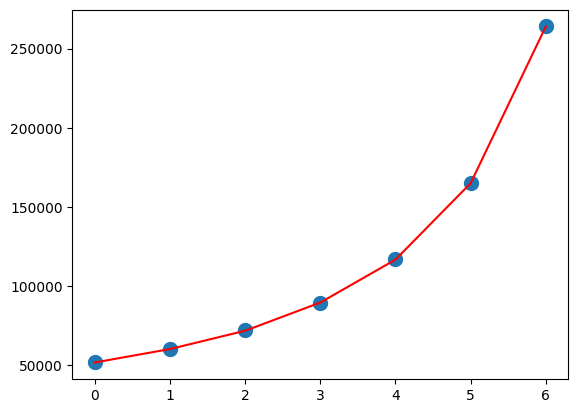

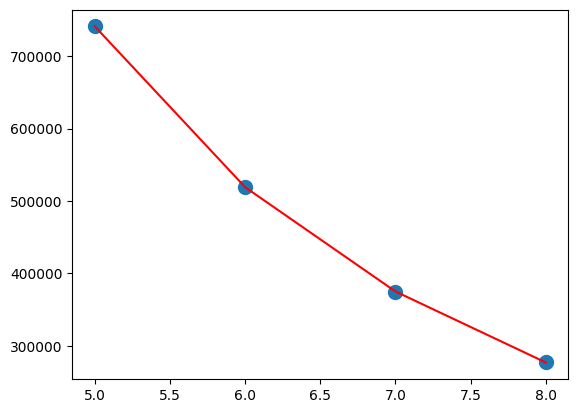

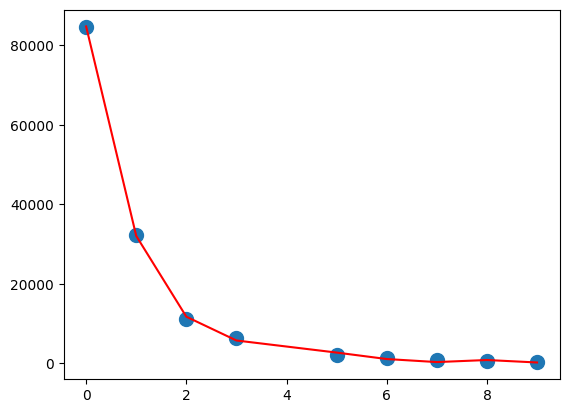

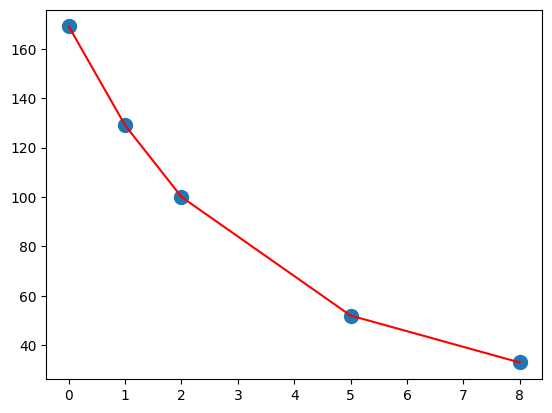

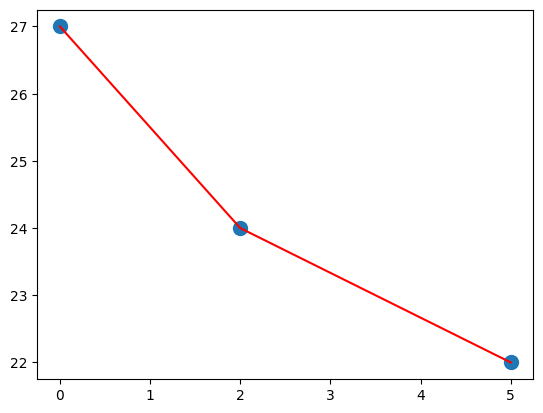

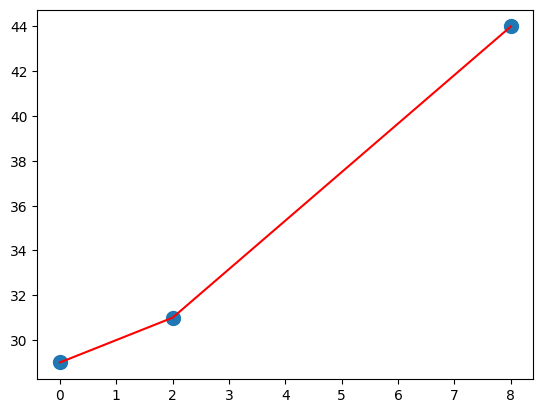

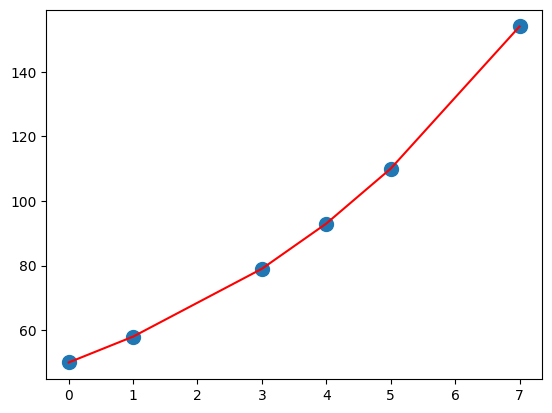

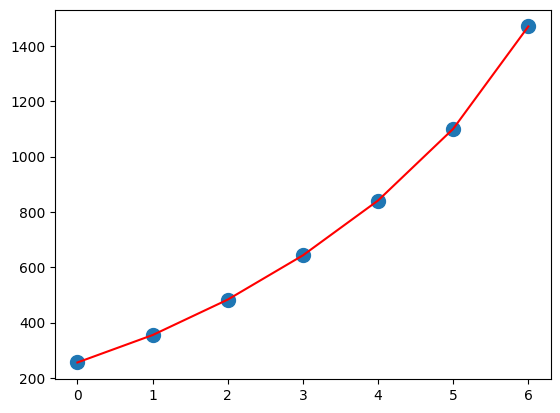

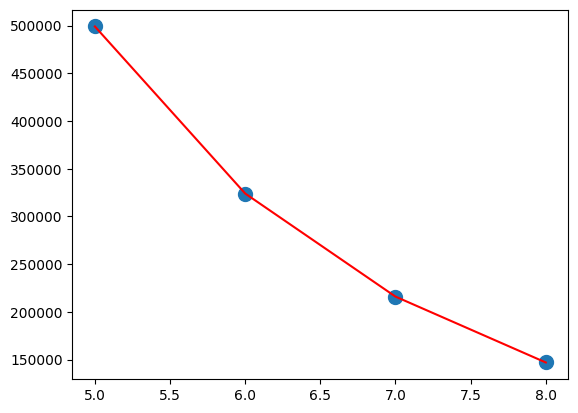

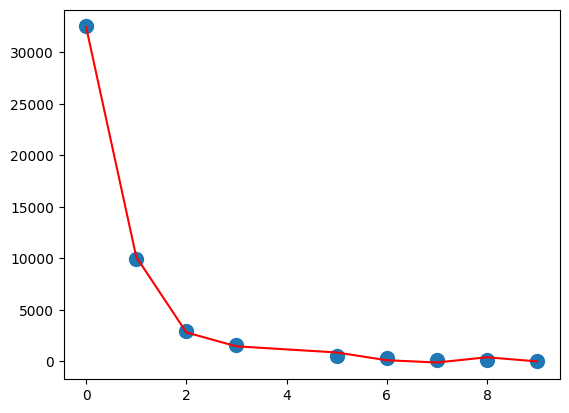

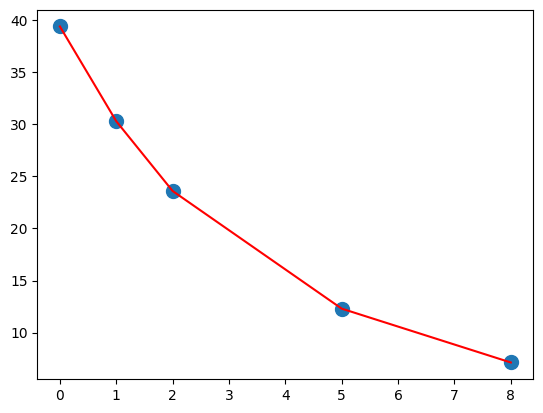

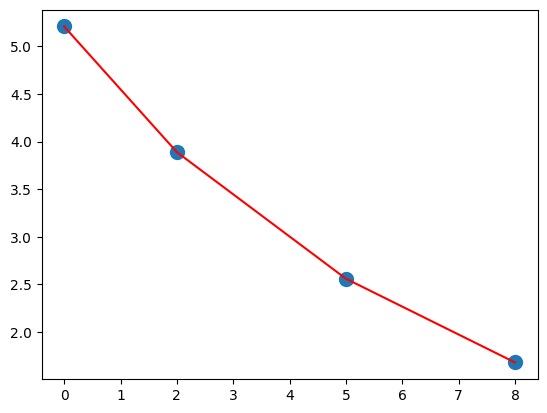

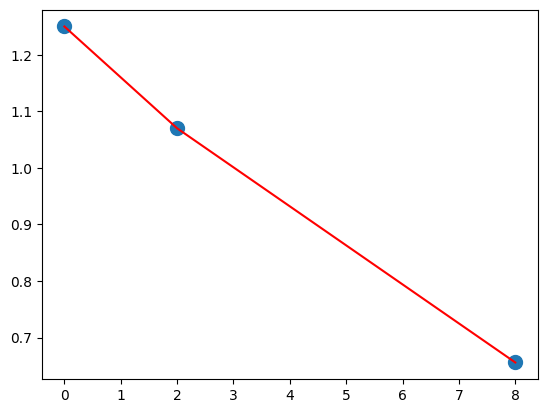

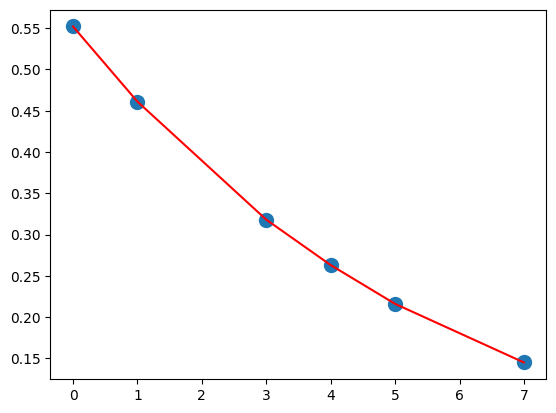

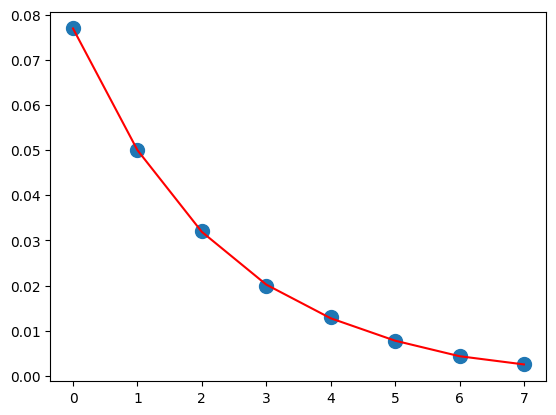

In [24]:
luminosity_models = {
    lc: {} for lc in ["I", "III", "V"]
}
for luminosity_class in ['I', 'III', 'V']:
    curr = eval(f"stellar_data_{luminosity_class}")
    for sp_type in "OBAFGKM":
        x = np.array(list(pd.to_numeric(curr[curr["sp"].str.startswith(sp_type)]['sp'].str[1])))
        y = np.array(list(curr[curr["sp"].str.startswith(sp_type)]['L/L_o']))
        # print(x, y)
        fit = np.polyfit(x, y, 5)
        p = np.poly1d(fit)
        luminosity_models[luminosity_class][sp_type] = [p, r2_score(y, p(x))]
        # make a separate plot for each one
        plt.figure()
        plt.plot(x, y, 'o', label='Original data', markersize=10)
        plt.plot(x, p(x), 'r', label='Fitted line')
luminosity_models

(array([4., 2., 0., 5., 0., 3., 2., 1., 5., 1., 4., 4., 1., 2., 2., 4., 1.,
        2., 3., 5., 4., 6., 2., 6., 6., 2., 5., 7., 2., 2., 4., 5., 6., 6.,
        5., 1., 2., 2., 3., 2., 7., 3., 3., 1., 5., 6., 3., 0., 2., 6., 0.,
        1., 0., 1., 0., 2., 1., 4., 3., 1., 1., 2., 4., 3., 1., 3., 2., 0.,
        0., 1., 0., 1., 0., 2., 2., 1., 3., 0., 1., 0., 0., 1., 0., 2., 0.,
        1., 0., 0., 0., 1., 0., 2., 1., 1., 3., 1., 1., 4., 1., 4.]),
 array([  1.3019706 ,   2.49459814,   3.68722569,   4.87985323,
          6.07248078,   7.26510833,   8.45773587,   9.65036342,
         10.84299096,  12.03561851,  13.22824606,  14.4208736 ,
         15.61350115,  16.80612869,  17.99875624,  19.19138378,
         20.38401133,  21.57663888,  22.76926642,  23.96189397,
         25.15452151,  26.34714906,  27.5397766 ,  28.73240415,
         29.9250317 ,  31.11765924,  32.31028679,  33.50291433,
         34.69554188,  35.88816942,  37.08079697,  38.27342452,
         39.46605206,  40.65867961,  4

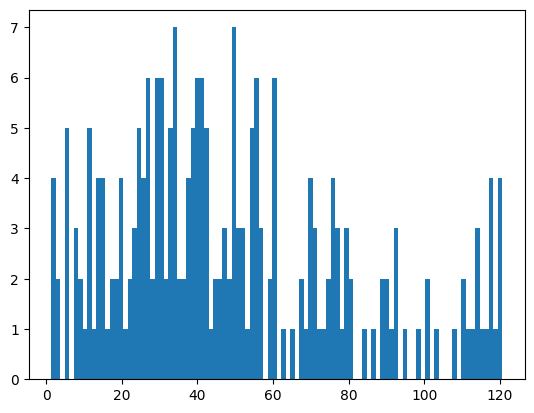

In [13]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    return data[s<m]

plt.hist(reject_outliers(star_data['Distance (pc)']), bins=100)

In [32]:
luminosity_list = []
star_sps = star_data['Spectral Class']
for c in star_sps:
    d = eval(c)
    # print(d)
    luminosity_list.append(luminosity_models[d[2]][d[0]][0](float(d[1])))
# print(luminosity_list)
star_data["L/L_o"] = luminosity_list
star_data.to_csv('star_data.csv', index=False)

In [7]:
from astropy.io import fits
from PIL import Image
import numpy as np

# Load the JPEG image
for file in os.listdir("Star Images"):
    jpg_file = os.path.join("Star Images", file)
    image = Image.open(jpg_file)

    # Convert the image to grayscale
    gray_image = image.convert('L')
    gray_image_data = np.array(gray_image)
    
    # Create a new FITS file
    fits_file = os.path.join("Star Images", file.replace(".jpg", ".fits"))  # Name of the output FITS file
    
    # Create a primary HDU with the image data
    hdu = fits.PrimaryHDU(gray_image_data)
    
    # Save the FITS file
    hdu.writeto(fits_file, overwrite=True)
    
    print(f"JPEG image '{jpg_file}' has been converted to FITS format and saved as '{fits_file}'.")

JPEG image 'Star Images/Bubup.fits' has been converted to FITS format and saved as 'Star Images/Bubup.fits'.
JPEG image 'Star Images/Celaeno.fits' has been converted to FITS format and saved as 'Star Images/Celaeno.fits'.
JPEG image 'Star Images/Hadar.fits' has been converted to FITS format and saved as 'Star Images/Hadar.fits'.
JPEG image 'Star Images/Alrescha.fits' has been converted to FITS format and saved as 'Star Images/Alrescha.fits'.
JPEG image 'Star Images/Gomeisa.jpg' has been converted to FITS format and saved as 'Star Images/Gomeisa.fits'.
JPEG image 'Star Images/Nunki.fits' has been converted to FITS format and saved as 'Star Images/Nunki.fits'.
JPEG image 'Star Images/Moriah.jpg' has been converted to FITS format and saved as 'Star Images/Moriah.fits'.
JPEG image 'Star Images/Achernar.jpg' has been converted to FITS format and saved as 'Star Images/Achernar.fits'.
JPEG image 'Star Images/Sargas.fits' has been converted to FITS format and saved as 'Star Images/Sargas.fits'

In [8]:
import numpy as np
from astropy.io import fits
from photutils.psf import extract_stars
from photutils.detection import DAOStarFinder
import matplotlib.pyplot as plt
from astropy.nddata import NDData
from photutils.detection import find_peaks
from astropy.table import Table

# Load your image
image_file = os.path.join("Star Images", "Acamar.fits")
hdu_list = fits.open(image_file)
image_data = hdu_list[0].data
hdu_list.close()

peaks_tbl = find_peaks(image_data, threshold=500.0)
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output  
print(peaks_tbl)

size = 100
hsize = (size - 1) / 2
x = peaks_tbl['x_peak']
y = peaks_tbl['y_peak']
mask = ((x > hsize) & (x < (image_data.shape[1] -1 - hsize)) &
        (y > hsize) & (y < (image_data.shape[0] -1 - hsize)))

stars_tbl = Table()
stars_tbl['x'] = x[mask]
stars_tbl['y'] = y[mask]

from astropy.stats import sigma_clipped_stats
mean_val, median_val, std_val = sigma_clipped_stats(image_data, sigma=2.0)
image_data -= median_val

# # Define a star finder to identify stars in the image
# daofind = DAOStarFinder(fwhm=4.0, threshold=5.0)
# 
# # Find stars in the image
# sources = daofind(image_data)

# Extract stars using photutils.psf.extract_stars with cutout_size
image_data = NDData(image_data)
cutout_size = 100  # Adjust this as needed
stars = extract_stars(image_data, stars_tbl, size=cutout_size)

# Plot the extracted stars
plt.figure(figsize=(8, 8))
for star in stars:
    plt.imshow(star, cmap='gray', origin='lower')
    plt.colorbar()
    plt.show()


TypeError: 'NoneType' object is not subscriptable

In [2]:
import cv2
import numpy as np
import os

def extract_central_star(image_path):
    # Read the image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply adaptive thresholding to separate stars from the background
    _, thresholded_image = cv2.threshold(blurred_image, 50, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area (size) to exclude small stars
    min_star_area = 50
    selected_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_star_area]

    # Create a mask to visualize the selected stars
    mask = np.zeros_like(gray_image)
    cv2.drawContours(mask, selected_contours, -1, 255, thickness=cv2.FILLED)

    # Bitwise AND operation to extract the central star
    central_star = cv2.bitwise_and(original_image, original_image, mask=mask)

    # Display the results
    cv2.imshow("Original Image", original_image)
    cv2.imshow("Selected Stars Mask", mask)
    cv2.imshow("Extracted Central Star", central_star)
    # cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # Save the image file to a new Removed BG directory
    cv2.imwrite(image_path.split(".")[0] + "_removedbg" + ".jpg", central_star)

In [ ]:
import cv2
import numpy as np

def perform_background_subtraction(image_path):
    # Read the image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and help with thresholding
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply adaptive thresholding to separate stars from the background
    _, thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to keep only the regions with stars
    mask = np.zeros_like(original_image)
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Apply the mask to the original image
    result_image = cv2.bitwise_and(original_image, mask)

    # Display the original image, thresholded image, and result image
    cv2.imshow('Original Image', original_image)
    cv2.imshow('Thresholded Image', thresholded_image)
    cv2.imshow('Result Image', result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Replace 'your_image_path.jpg' with the path to your star image
perform_background_subtraction('Star Images/Alrakis.jpg')

2023-11-20 14:20:08.401 Python[20422:1119395] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [3]:
# Do this for all the images in the Star Images directory and save these images to a new Removed BG directory
for file in os.listdir("Star Images"):
    if file.endswith(".fits"):
        continue
    jpg_file = os.path.join("Star Images", file)
    extract_central_star(jpg_file)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
def create_model():
    # Image input
    image_input = layers.Input(shape=(500, 500, 3), name='image_input')

    # Luminosity input
    luminosity_input = layers.Input(shape=(1,), name='luminosity_input')

    # Flatten the image and concatenate with the luminosity input
    flat_image = layers.Flatten()(image_input)
    concatenated_input = layers.Concatenate()([flat_image, luminosity_input])

    # Dense layers for correlation
    dense1 = layers.Dense(64, activation='relu')(concatenated_input)
    dense2 = layers.Dense(32, activation='relu')(dense1)

    # Output layer for distance prediction
    distance_output = layers.Dense(1, name='distance_output')(dense2)

    # Define the model with two inputs and one output
    model = models.Model(inputs=[image_input, luminosity_input], outputs=distance_output)

    return model

num_samples = 1000
height, width, channels = 500, 500, 3

X_images = np.random.rand(num_samples, height, width, channels)
X_luminosity = np.random.rand(num_samples, 1)
y_distance = np.random.rand(num_samples, 1)

# Create an instance of the model
model = create_model()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()
